In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


method (how it was discovered)

year (discovery year)

orbital_period

mass

distance (from Earth)

In [3]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
missing = planets.isna().mean().sort_values(ascending=False)
missing

mass              0.504348
distance          0.219324
orbital_period    0.041546
method            0.000000
number            0.000000
year              0.000000
dtype: float64

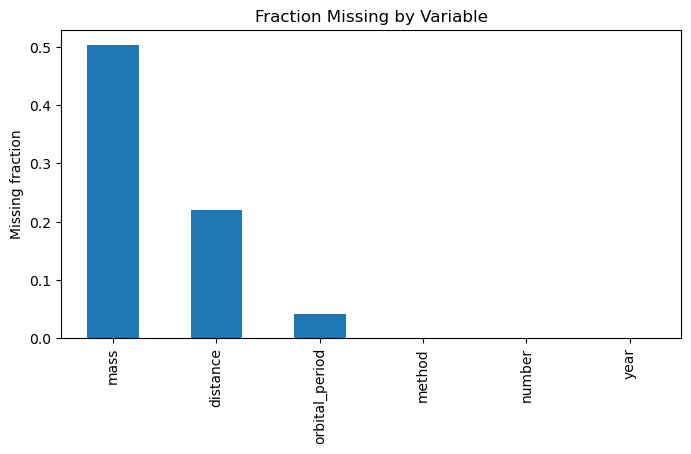

In [5]:
plt.figure(figsize=(8,4))
missing.plot(kind="bar")
plt.title("Fraction Missing by Variable")
plt.ylabel("Missing fraction")
plt.show()

In [6]:
# Counts by method

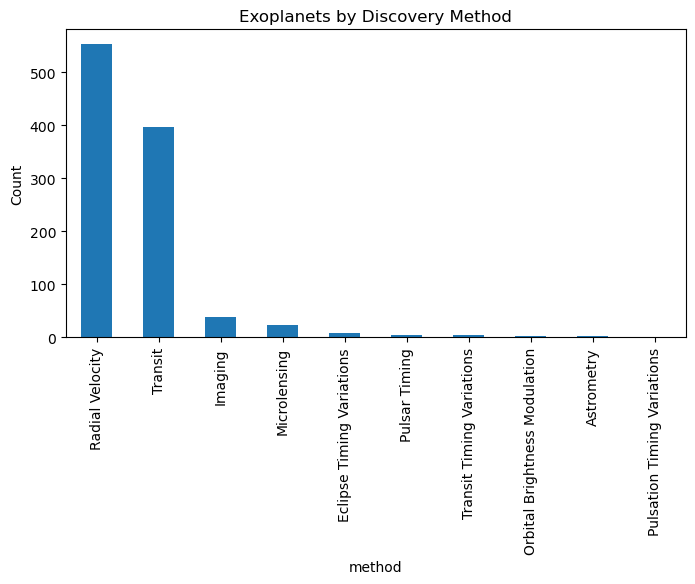

In [7]:
method_counts = planets["method"].value_counts()

plt.figure(figsize=(8,4))
method_counts.plot(kind="bar")
plt.title("Exoplanets by Discovery Method")
plt.ylabel("Count")
plt.show()

In [8]:
# Method mix over time

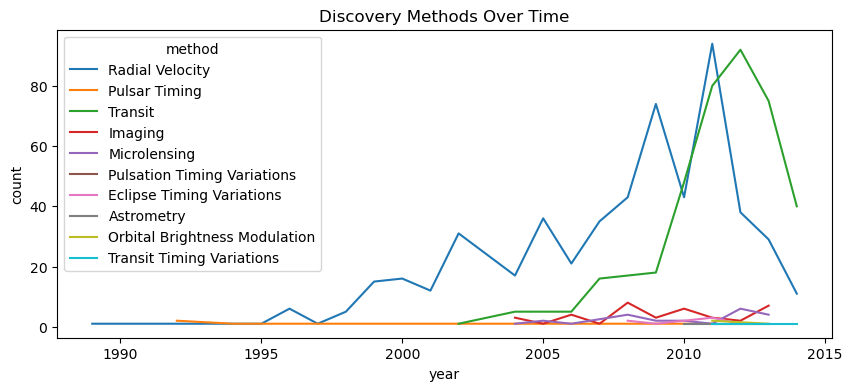

In [9]:
method_year = (
    planets.groupby(["year", "method"])
           .size()
           .reset_index(name="count")
)

plt.figure(figsize=(10,4))
sns.lineplot(
    data=method_year,
    x="year",
    y="count",
    hue="method"
)
plt.title("Discovery Methods Over Time")
plt.show()

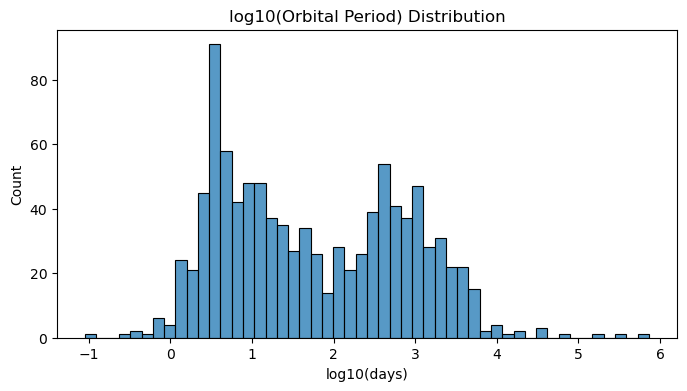

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(
    np.log10(planets["orbital_period"].dropna()),
    bins=50
)
plt.title("log10(Orbital Period) Distribution")
plt.xlabel("log10(days)")
plt.show()

In [11]:
# Period by method

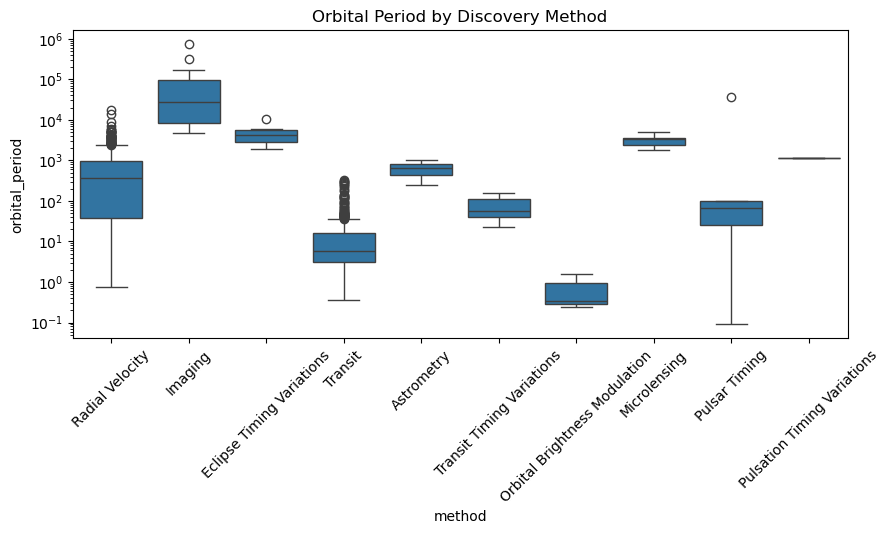

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(
    data=planets,
    x="method",
    y="orbital_period"
)
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Orbital Period by Discovery Method")
plt.show()

In [13]:
# Who has mass measured?

In [14]:
planets["mass_known"] = planets["mass"].notna()

pd.crosstab(planets["method"], planets["mass_known"], normalize="index")

mass_known,False,True
method,,
Astrometry,1.000000,0.000000
Eclipse Timing Variations,0.777778,0.222222
Imaging,1.000000,0.000000
Microlensing,1.000000,0.000000
Orbital Brightness Modulation,1.000000,0.000000
Pulsar Timing,1.000000,0.000000
Pulsation Timing Variations,1.000000,0.000000
Radial Velocity,0.077758,0.922242
Transit,0.997481,0.002519


In [15]:
# Mass distribution

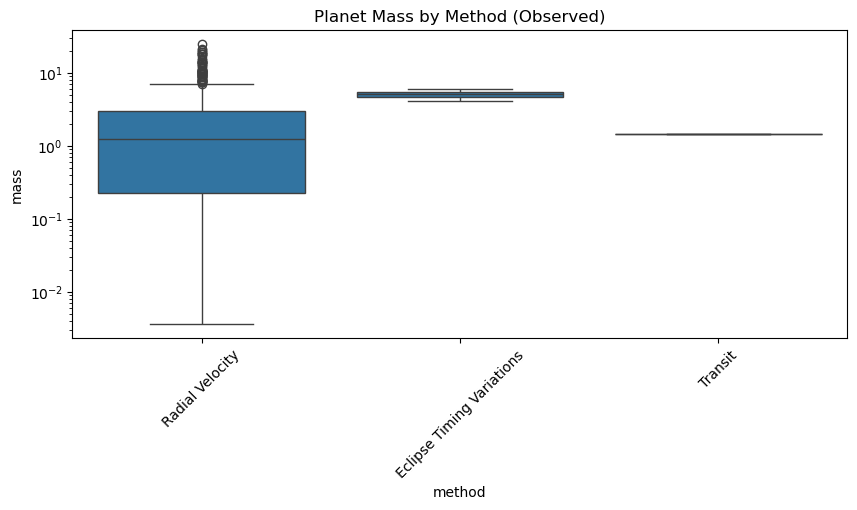

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(
    data=planets.dropna(subset=["mass"]),
    x="method",
    y="mass"
)
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Planet Mass by Method (Observed)")
plt.show()

In [17]:
# Distance

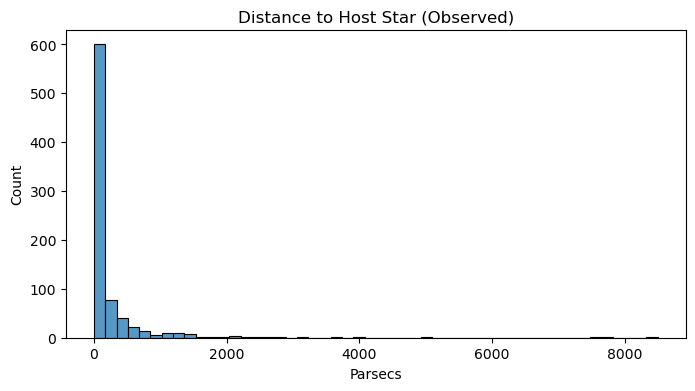

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(
    planets["distance"].dropna(),
    bins=50
)
plt.title("Distance to Host Star (Observed)")
plt.xlabel("Parsecs")
plt.show()

In [19]:
# Do methods differ in how far away their planets are?

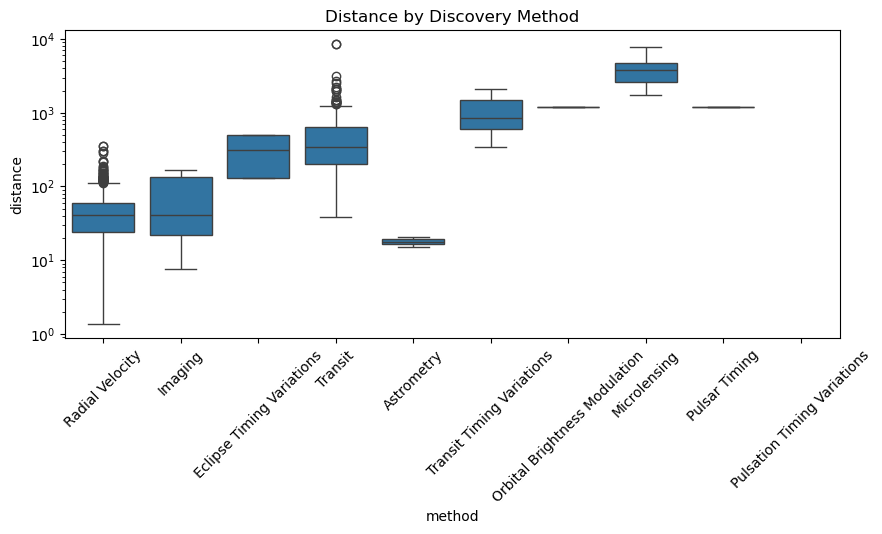

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(
    data=planets,
    x="method",
    y="distance"
)
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Distance by Discovery Method")
plt.show()

#### The observed exoplanet population is strongly shaped by discovery methods and measurement constraints. 

#### Distributions of orbital period, mass, and distance reflect instrumental selection effects rather than underlying planetary abundance. 

#### Apparent regularities in the data are therefore conditional on how planets are detected, highlighting the epistemic limits of observational catalogs.

In [21]:
# How common are multi-planet discoveries?

In [22]:
planets["is_multi"] = planets["number"] > 1
planets["is_multi"].value_counts(normalize=True)

is_multi
False    0.574879
True     0.425121
Name: proportion, dtype: float64

In [23]:
pd.crosstab(
    planets["method"],
    planets["is_multi"],
    normalize="index"
)

is_multi,False,True
method,,
Astrometry,1.000000,0.000000
Eclipse Timing Variations,0.333333,0.666667
Imaging,0.894737,0.105263
Microlensing,0.826087,0.173913
Orbital Brightness Modulation,0.333333,0.666667
Pulsar Timing,0.400000,0.600000
Pulsation Timing Variations,1.000000,0.000000
Radial Velocity,0.593128,0.406872
Transit,0.516373,0.483627


In [24]:
# Number of planets vs orbital period

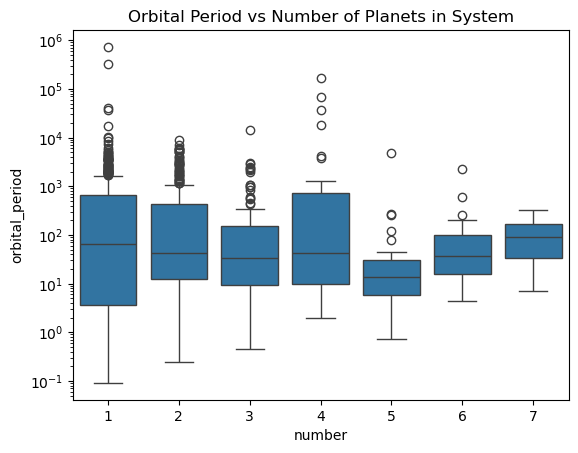

In [25]:
sns.boxplot(
    data=planets,
    x="number",
    y="orbital_period"
)
plt.yscale("log")
plt.title("Orbital Period vs Number of Planets in System")
plt.show()

In [26]:
# What changed over time?

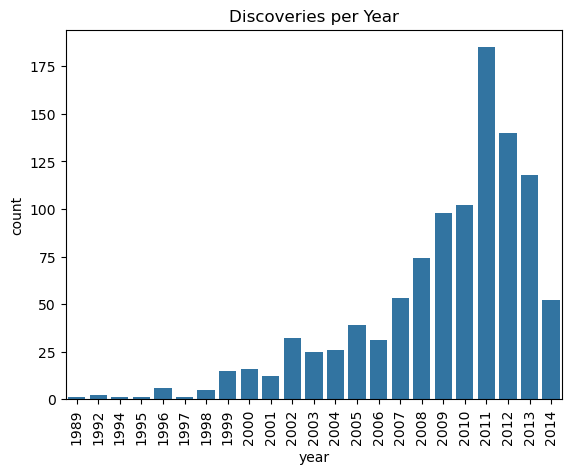

In [27]:
sns.countplot(
    data=planets,
    x="year"
)
plt.xticks(rotation=90)
plt.title("Discoveries per Year")
plt.show()

In [28]:
# Median orbital period by discovery year

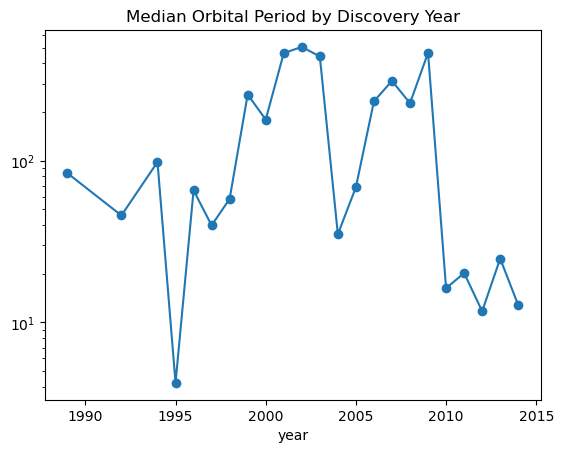

In [29]:
year_period = (
    planets
    .groupby("year")["orbital_period"]
    .median()
)

year_period.plot(marker="o")
plt.yscale("log")
plt.title("Median Orbital Period by Discovery Year")
plt.show()

In [30]:
# Distance over time

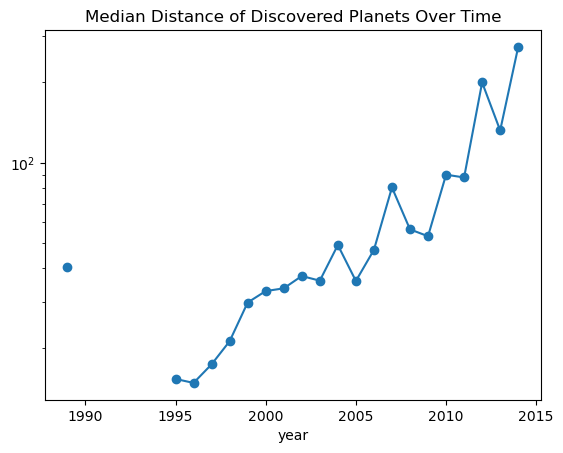

In [31]:
year_dist = planets.groupby("year")["distance"].median()

year_dist.plot(marker="o")
plt.yscale("log")
plt.title("Median Distance of Discovered Planets Over Time")
plt.show()

In [32]:
# Orbital period × mass (with method hue)

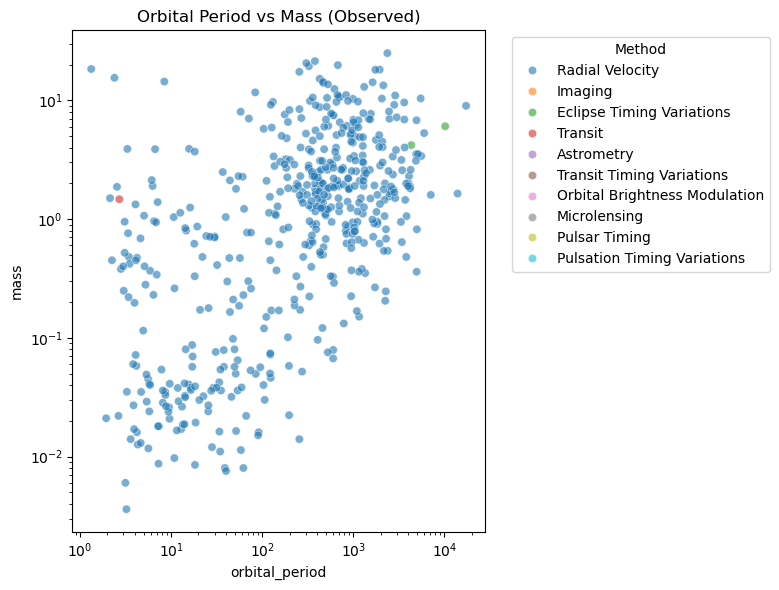

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=planets,
    x="orbital_period",
    y="mass",
    hue="method",
    alpha=0.6
)

plt.xscale("log")
plt.yscale("log")
plt.title("Orbital Period vs Mass (Observed)")

plt.legend(
    title="Method",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

In [34]:
# Orbital period × distance

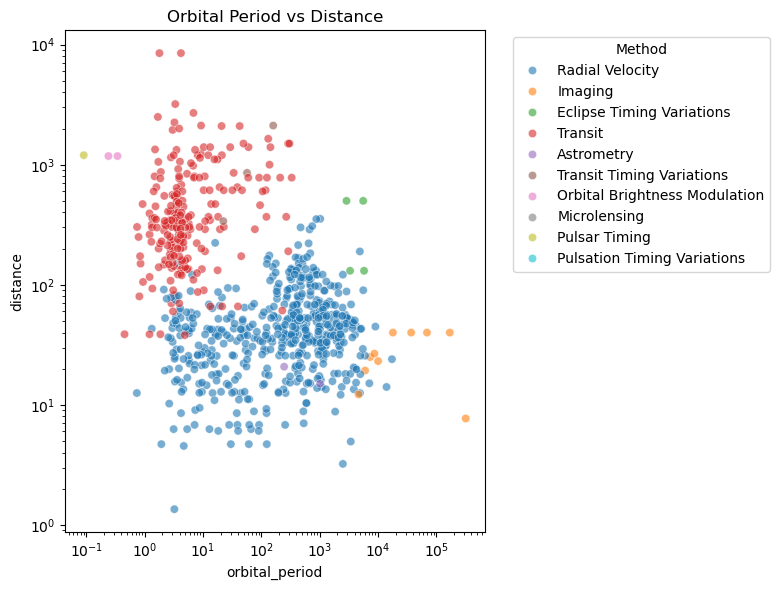

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=planets,
    x="orbital_period",
    y="distance",
    hue="method",
    alpha=0.6
)

plt.xscale("log")
plt.yscale("log")
plt.title("Orbital Period vs Distance")

plt.legend(
    title="Method",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

In [36]:
# What combinations are missing?

In [37]:
planets[["orbital_period", "mass", "distance"]].isna().mean()

orbital_period    0.041546
mass              0.504348
distance          0.219324
dtype: float64

In [38]:
missing_by_method = (
    planets
    .groupby("method")[["orbital_period", "mass", "distance"]]
    .apply(lambda x: x.isna().mean())
)

missing_by_method

,orbital_period,mass,distance
method,,,
Astrometry,0.000000,1.000000,0.000000
Eclipse Timing Variations,0.000000,0.777778,0.555556
Imaging,0.684211,1.000000,0.157895
Microlensing,0.695652,1.000000,0.565217
Orbital Brightness Modulation,0.000000,1.000000,0.333333
Pulsar Timing,0.000000,1.000000,0.800000
Pulsation Timing Variations,0.000000,1.000000,1.000000
Radial Velocity,0.000000,0.077758,0.041591
Transit,0.000000,0.997481,0.435768


#### The observed exoplanet catalog reflects an evolving measurement process rather than a stable underlying distribution. 

#### Discovery methods determine which planetary properties are recorded, multi-planet systems are disproportionately detected by transit methods, and apparent trends in mass, orbital period, and distance shift over time as detection capabilities expand. 

#### Missing data and empty regions in joint distributions therefore encode instrumental limits rather than astrophysical absence.